In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://www.dropbox.com/scl/fi/9vyv9p61y6b9rm67eva57/archive.zip?rlkey=ilbqep1uckq9eooobr9069oe6&st=4e8p3m7h&dl=0

--2024-06-18 23:45:09--  https://www.dropbox.com/scl/fi/9vyv9p61y6b9rm67eva57/archive.zip?rlkey=ilbqep1uckq9eooobr9069oe6
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9be1d754cd10ecde8be044da54.dl.dropboxusercontent.com/cd/0/inline/CVHoXUU9iQtrIGHHPphmLQnBnIPE8SA0LAc_nWyXIXNAh3hYhjHUDTzP8ke6oJ3c6oiLFDo-6oWiVnglAAEGxs9tWWBCreoMVeG5WIL7iuJP7xpKLjvC9aolgq9WQk02tzsynv6V2ePKUQF583EOA-Nx/file# [following]
--2024-06-18 23:45:09--  https://uc9be1d754cd10ecde8be044da54.dl.dropboxusercontent.com/cd/0/inline/CVHoXUU9iQtrIGHHPphmLQnBnIPE8SA0LAc_nWyXIXNAh3hYhjHUDTzP8ke6oJ3c6oiLFDo-6oWiVnglAAEGxs9tWWBCreoMVeG5WIL7iuJP7xpKLjvC9aolgq9WQk02tzsynv6V2ePKUQF583EOA-Nx/file
Resolving uc9be1d754cd10ecde8be044da54.dl.dropboxusercontent.com (uc9be1d754cd10ecde8be044da54.dl.dropboxusercontent.com)... 162.125.1.15, 2620:10

In [3]:
!unzip /content/archive.zip?rlkey=ilbqep1uckq9eooobr9069oe6

Archive:  /content/archive.zip?rlkey=ilbqep1uckq9eooobr9069oe6
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [5]:
ROOT_DIR = "/content/brain_tumor_dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))


number_of_images.items()

dict_items([('no', 98), ('yes', 155)])

In [6]:
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/" + dir)

    for img in np.random.choice( a = os.listdir(os.path.join(ROOT_DIR, dir)),
                         size = (math.floor(70/100*number_of_images[dir])-3),
                             replace = False):
      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join("./train", dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Folder exists")

In [7]:
def dataFolder(p, split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+ "/"+ dir)

      for img in np.random.choice( a = os.listdir(os.path.join(ROOT_DIR, dir)),
                         size = (math.floor(split*number_of_images[dir])-3),
                             replace = False):
       O = os.path.join(ROOT_DIR, dir, img)
       D = os.path.join("./"+p, dir)
       shutil.copy(O,D)
       os.remove(O)
  else:
    print(f"{p}Folder exists")

In [8]:
dataFolder("train", 0.7)

trainFolder exists


In [9]:
dataFolder( "val", 0.15)

In [10]:
dataFolder( "test", 0.15)

MODEL BUILD

In [11]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [12]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size = (3,3), activation = "relu", input_shape = (224,224,3)))

model.add(Conv2D(filters=36, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [13]:
model.compile(optimizer = "adam", loss = keras.losses.binary_crossentropy,
              metrics = ["accuracy"])

Preparing Data using Data Generator

In [29]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path,
                               target_size = (224,224),
                               batch_size = 32,
                               class_mode = "binary")
  return image

In [15]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 170 images belonging to 2 classes.


In [30]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [16]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(rescale = 1./255
                                  )
  image = image_data.flow_from_directory(directory = path,
                               target_size = (224,224),
                               batch_size = 32,
                               class_mode = "binary")
  return image

In [17]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 31 images belonging to 2 classes.


In [18]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 31 images belonging to 2 classes.


In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01,
                   patience = 3, verbose = 1, mode = "auto")

mc = ModelCheckpoint(filepath = "./bestmodel.h5", monitor = "val_accuracy",
                     verbose = 1, save_best_only = True, mode = "auto")

cd = [es, mc]

Model Training

In [20]:
hs = model.fit_generator(generator=train_data,
                    steps_per_epoch = 4,
                    epochs = 30,
                    verbose=1,
                    validation_data = val_data,
                    validation_steps = 16,
                    callbacks = cd)

Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 0.6519 - accuracy: 0.6509


Epoch 1: val_accuracy improved from -inf to 0.70968, saving model to ./bestmodel.h5
4/4 [==============================] - 14s 1s/step - loss: 0.6519 - accuracy: 0.6509 - val_loss: 0.6132 - val_accuracy: 0.7097
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 0.6144 - accuracy: 0.6953

4/4 [==============================] - 2s 422ms/step - loss: 0.6144 - accuracy: 0.6953
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.6226

4/4 [==============================] - 1s 304ms/step - loss: 0.6712 - accuracy: 0.6226
Epoch 4/30
4/4 [==============================] - ETA: 0s - loss: 0.5956 - accuracy: 0.7170

4/4 [==============================] - 1s 423ms/step - loss: 0.5956 - accuracy: 0.7170
Epoch 5/30
4/4 [==============================] - ETA: 0s - loss: 0.6340 - accuracy: 0.6981

4/4 [==============================] - 1s 409ms/step - loss: 0.6340 - accuracy: 0.6981
Epoch 6/30
4/4 [==============================] - ETA: 0s - loss: 0.5968 - accuracy: 0.7264

4/4 [==============================] - 2s 447ms/step - loss: 0.5968 - accuracy: 0.7264
Epoch 7/30
4/4 [==============================] - ETA: 0s - loss: 0.5490 - accuracy: 0.7500

4/4 [==============================] - 2s 392ms/step - loss: 0.5490 - accuracy: 0.7500
Epoch 8/30
4/4 [==============================] - ETA: 0s - loss: 0.4762 - accuracy: 0.7969

4/4 [==============================] - 2s 397ms/step - loss: 0.4762 - accuracy: 0.7969
Epoch 9/30
4/4 [==============================] - ETA: 0s - loss: 0.5289 - accuracy: 0.7830

4/4 [==============================] - 1s 419ms/step - loss: 0.5289 - accuracy: 0.7830
Epoch 10/30
4/4 [==============================] - ETA: 0s - loss: 0.5180 - accuracy: 0.7358

4/4 [==============================] - 1s 413ms/step - loss: 0.5180 - accuracy: 0.7358
Epoch 11/30
4/4 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.8302

4/4 [==============================] - 1s 411ms/step - loss: 0.4488 - accuracy: 0.8302
Epoch 12/30
4/4 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.8113

4/4 [==============================] - 2s 458ms/step - loss: 0.4037 - accuracy: 0.8113
Epoch 13/30
4/4 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.8047

4/4 [==============================] - 2s 397ms/step - loss: 0.5347 - accuracy: 0.8047
Epoch 14/30
4/4 [==============================] - ETA: 0s - loss: 0.3995 - accuracy: 0.8396

4/4 [==============================] - 1s 291ms/step - loss: 0.3995 - accuracy: 0.8396
Epoch 15/30
4/4 [==============================] - ETA: 0s - loss: 0.4135 - accuracy: 0.8113

4/4 [==============================] - 1s 291ms/step - loss: 0.4135 - accuracy: 0.8113
Epoch 16/30
4/4 [==============================] - ETA: 0s - loss: 0.3762 - accuracy: 0.8585

4/4 [==============================] - 1s 399ms/step - loss: 0.3762 - accuracy: 0.8585
Epoch 17/30
4/4 [==============================] - ETA: 0s - loss: 0.4220 - accuracy: 0.8113

4/4 [==============================] - 1s 295ms/step - loss: 0.4220 - accuracy: 0.8113
Epoch 18/30
4/4 [==============================] - ETA: 0s - loss: 0.3221 - accuracy: 0.8585

4/4 [==============================] - 1s 430ms/step - loss: 0.3221 - accuracy: 0.8585
Epoch 19/30
4/4 [==============================] - ETA: 0s - loss: 0.4043 - accuracy: 0.8359

4/4 [==============================] - 2s 447ms/step - loss: 0.4043 - accuracy: 0.8359
Epoch 20/30
4/4 [==============================] - ETA: 0s - loss: 0.3394 - accuracy: 0.8585

4/4 [==============================] - 1s 416ms/step - loss: 0.3394 - accuracy: 0.8585
Epoch 21/30
4/4 [==============================] - ETA: 0s - loss: 0.3418 - accuracy: 0.8679

4/4 [==============================] - 1s 316ms/step - loss: 0.3418 - accuracy: 0.8679
Epoch 22/30
4/4 [==============================] - ETA: 0s - loss: 0.3863 - accuracy: 0.8585

4/4 [==============================] - 1s 407ms/step - loss: 0.3863 - accuracy: 0.8585
Epoch 23/30
4/4 [==============================] - ETA: 0s - loss: 0.3687 - accuracy: 0.8396

4/4 [==============================] - 1s 406ms/step - loss: 0.3687 - accuracy: 0.8396
Epoch 24/30
4/4 [==============================] - ETA: 0s - loss: 0.3717 - accuracy: 0.8491

4/4 [==============================] - 2s 356ms/step - loss: 0.3717 - accuracy: 0.8491
Epoch 25/30
4/4 [==============================] - ETA: 0s - loss: 0.2947 - accuracy: 0.8984

4/4 [==============================] - 2s 452ms/step - loss: 0.2947 - accuracy: 0.8984
Epoch 26/30
4/4 [==============================] - ETA: 0s - loss: 0.3352 - accuracy: 0.8585

4/4 [==============================] - 1s 297ms/step - loss: 0.3352 - accuracy: 0.8585
Epoch 27/30
4/4 [==============================] - ETA: 0s - loss: 0.3278 - accuracy: 0.8962

4/4 [==============================] - 1s 297ms/step - loss: 0.3278 - accuracy: 0.8962
Epoch 28/30
4/4 [==============================] - ETA: 0s - loss: 0.2909 - accuracy: 0.8868

4/4 [==============================] - 1s 309ms/step - loss: 0.2909 - accuracy: 0.8868
Epoch 29/30
4/4 [==============================] - ETA: 0s - loss: 0.3131 - accuracy: 0.8868

4/4 [==============================] - 1s 294ms/step - loss: 0.3131 - accuracy: 0.8868
Epoch 30/30
4/4 [==============================] - ETA: 0s - loss: 0.3681 - accuracy: 0.8396

4/4 [==============================] - 2s 633ms/step - loss: 0.3681 - accuracy: 0.8396


Model Graphical Interpretation

In [21]:
h = hs.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

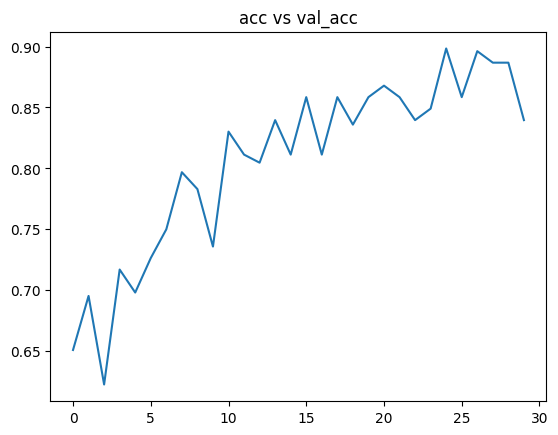

In [22]:
import matplotlib.pyplot as plt
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"], c = "red")
plt.title("acc vs val_acc")
plt.show()

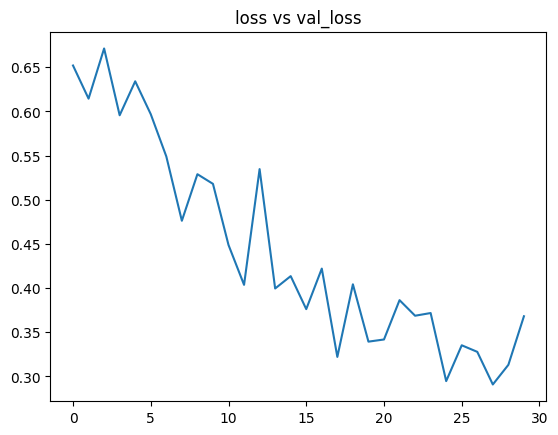

In [23]:
import matplotlib.pyplot as plt
plt.plot(h["loss"])
plt.plot(h["val_loss"], c = "red")
plt.title("loss vs val_loss")
plt.show()

In [24]:
from keras.models import load_model
model = load_model("/content/bestmodel.h5")

In [25]:
acc = model.evaluate_generator(test_data)[1]
print(f"Test Accuracy : {acc*100} %")

Test Accuracy : 70.96773982048035 %


In [26]:
from keras.preprocessing.image import load_img, img_to_array

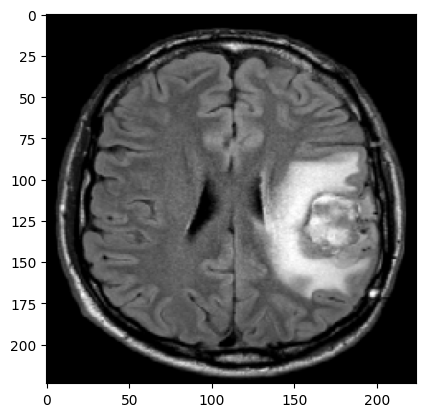

1/1 [==============================] - 0s 403ms/step
Yes Tumor


In [28]:

# Load and preprocess the image
path = "/content/brain_tumor_dataset/yes/Y92.png"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img) / 255.0  # Normalize the image

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)  # Add batch dimension

# Predict the class
pred = model.predict(input_arr)[0][0]  # Get probabilities
pred
# Get the predicted class index
#pred = np.argmax(pred, axis=0)[0]  # Get class index
#pred

if pred >= 0.5:
    print("Yes Tumor")
else:
    print("No Tumor")


In [ ]:
train_data.class_indices